1. Import Libraries

What:
We import essential Python libraries like pandas, numpy, seaborn, matplotlib, and sklearn.

Why:
Each library has a role:

pandas: Handle datasets (load, inspect, manipulate).

numpy: Numerical operations.

seaborn/matplotlib: Visualizations.

sklearn: Build ML models and preprocessing.

In [16]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score


2. Set Options
What:
Configure pandas and seaborn settings (like showing all columns or setting a plot style).

Why:
Improves readability of dataframes and consistency in visual output.

In [17]:
pd.set_option('display.max_columns', None)
sns.set(style='whitegrid')


3. Read Data
What:
Read the dataset using pd.read_csv().

Why:
Loads the dataset into a DataFrame for exploration and processing.


In [18]:
df = pd.read_csv(r"C:\Users\Anchita Lokhande\Downloads\estimation+of+obesity+levels+based+on+eating+habits+and+physical+condition\ObesityDataSet_raw_and_data_sinthetic.csv")
df.head()


,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


4 . Data Analysis and Preparation
4.1 Understand the Dataset


4.1.1 Data Type
What:
Use df.info() to check data types and non-null counts.

Why:
Helps identify:

Categorical vs. numerical columns.

Presence of object types.

Potential null/missing values.



In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Gender                          2111 non-null   object 
 1   Age                             2111 non-null   float64
 2   Height                          2111 non-null   float64
 3   Weight                          2111 non-null   float64
 4   family_history_with_overweight  2111 non-null   object 
 5   FAVC                            2111 non-null   object 
 6   FCVC                            2111 non-null   float64
 7   NCP                             2111 non-null   float64
 8   CAEC                            2111 non-null   object 
 9   SMOKE                           2111 non-null   object 
 10  CH2O                            2111 non-null   float64
 11  SCC                             2111 non-null   object 
 12  FAF                             21

4.1.2 Summary Statistics

What:
Use df.describe().

Why:
Understand:

Range (min, max).

Central tendency (mean, median).

Spread (std deviation).
This helps identify anomalies or skewed data.

In [20]:
df.describe(include= 'all')

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
count,2111,2111.000000,2111.000000,2111.000000,2111,2111,2111.000000,2111.000000,2111,2111,2111.000000,2111,2111.000000,2111.000000,2111,2111,2111
unique,2,NaN,NaN,NaN,2,2,NaN,NaN,4,2,NaN,2,NaN,NaN,4,5,7
top,Male,NaN,NaN,NaN,yes,yes,NaN,NaN,Sometimes,no,NaN,no,NaN,NaN,Sometimes,Public_Transportation,Obesity_Type_I
freq,1068,NaN,NaN,NaN,1726,1866,NaN,NaN,1765,2067,NaN,2015,NaN,NaN,1401,1580,351
mean,NaN,24.312600,1.701677,86.586058,NaN,NaN,2.419043,2.685628,NaN,NaN,2.008011,NaN,1.010298,0.657866,NaN,NaN,NaN
std,NaN,6.345968,0.093305,26.191172,NaN,NaN,0.533927,0.778039,NaN,NaN,0.612953,NaN,0.850592,0.608927,NaN,NaN,NaN
min,NaN,14.000000,1.450000,39.000000,NaN,NaN,1.000000,1.000000,NaN,NaN,1.000000,NaN,0.000000,0.000000,NaN,NaN,NaN
25%,NaN,19.947192,1.630000,65.473343,NaN,NaN,2.000000,2.658738,NaN,NaN,1.584812,NaN,0.124505,0.000000,NaN,NaN,NaN
50%,NaN,22.777890,1.700499,83.000000,NaN,NaN,2.385502,3.000000,NaN,NaN,2.000000,NaN,1.000000,0.625350,NaN,NaN,NaN
75%,NaN,26.000000,1.768464,107.430682,NaN,NaN,3.000000,3.000000,NaN,NaN,2.477420,NaN,1.666678,1.000000,NaN,NaN,NaN


4.1.3 Distribution of Variables
What:
Plot histograms or KDE plots of numeric features.

Why:
Understand how data is distributed (normal, skewed, bimodal).
It helps decide transformations (e.g., log scale) or binning.



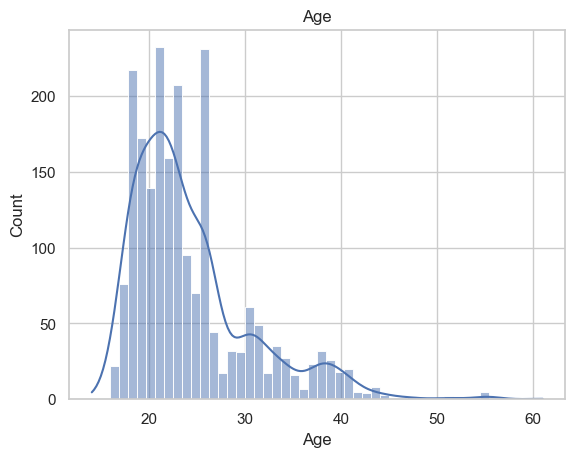

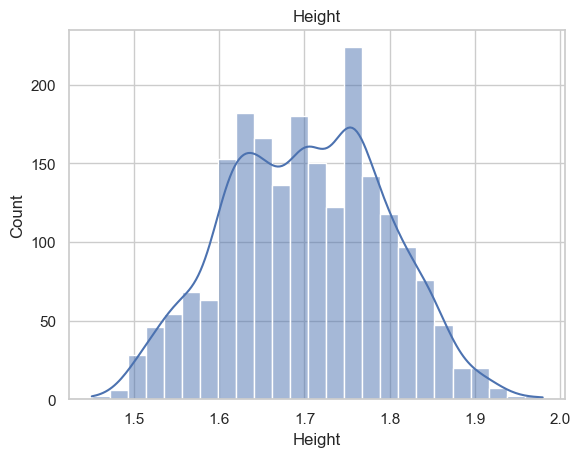

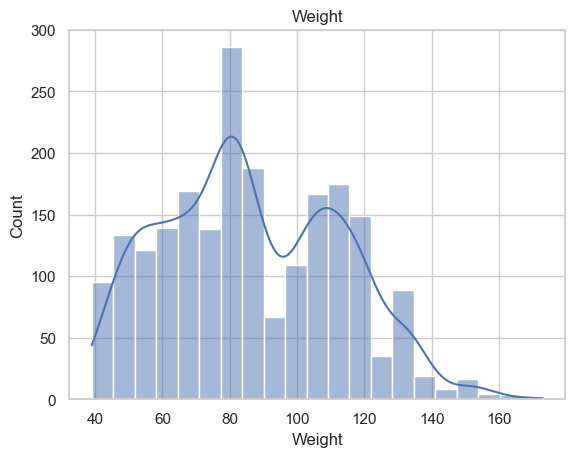

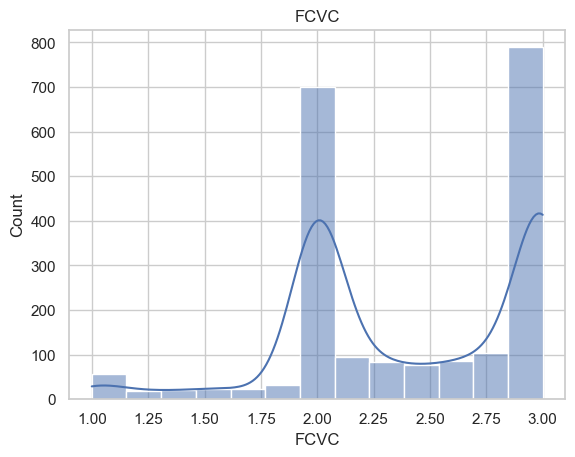

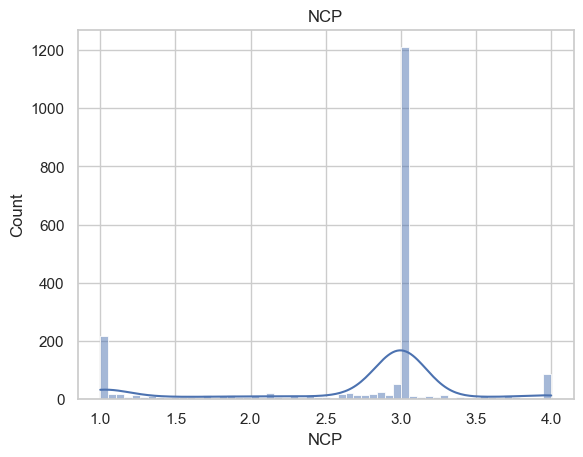

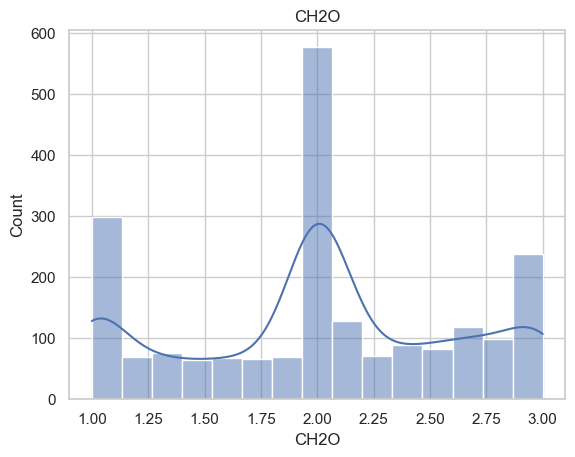

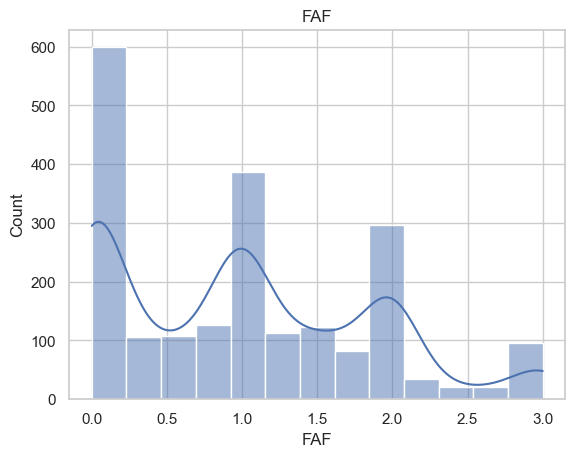

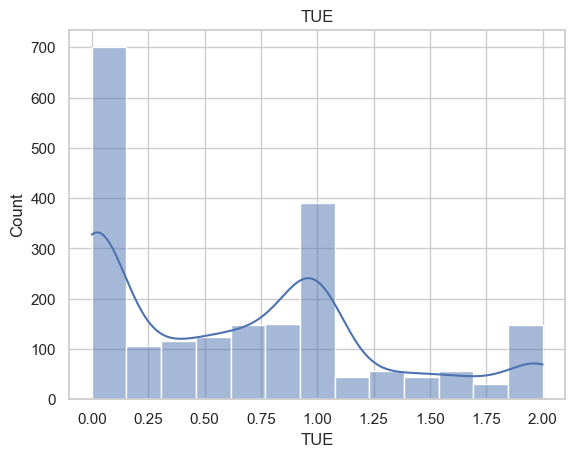

In [21]:
for col in df.select_dtypes(include=['float64', 'int64']).columns:
    sns.histplot(df[col], kde=True)
    plt.title(col)
    plt.show()


In [22]:
df_corr = df.copy()

In [23]:
for col in df_corr.select_dtypes(include= 'object').columns:
    df_corr[col] = LabelEncoder().fit_transform(df_corr[col])

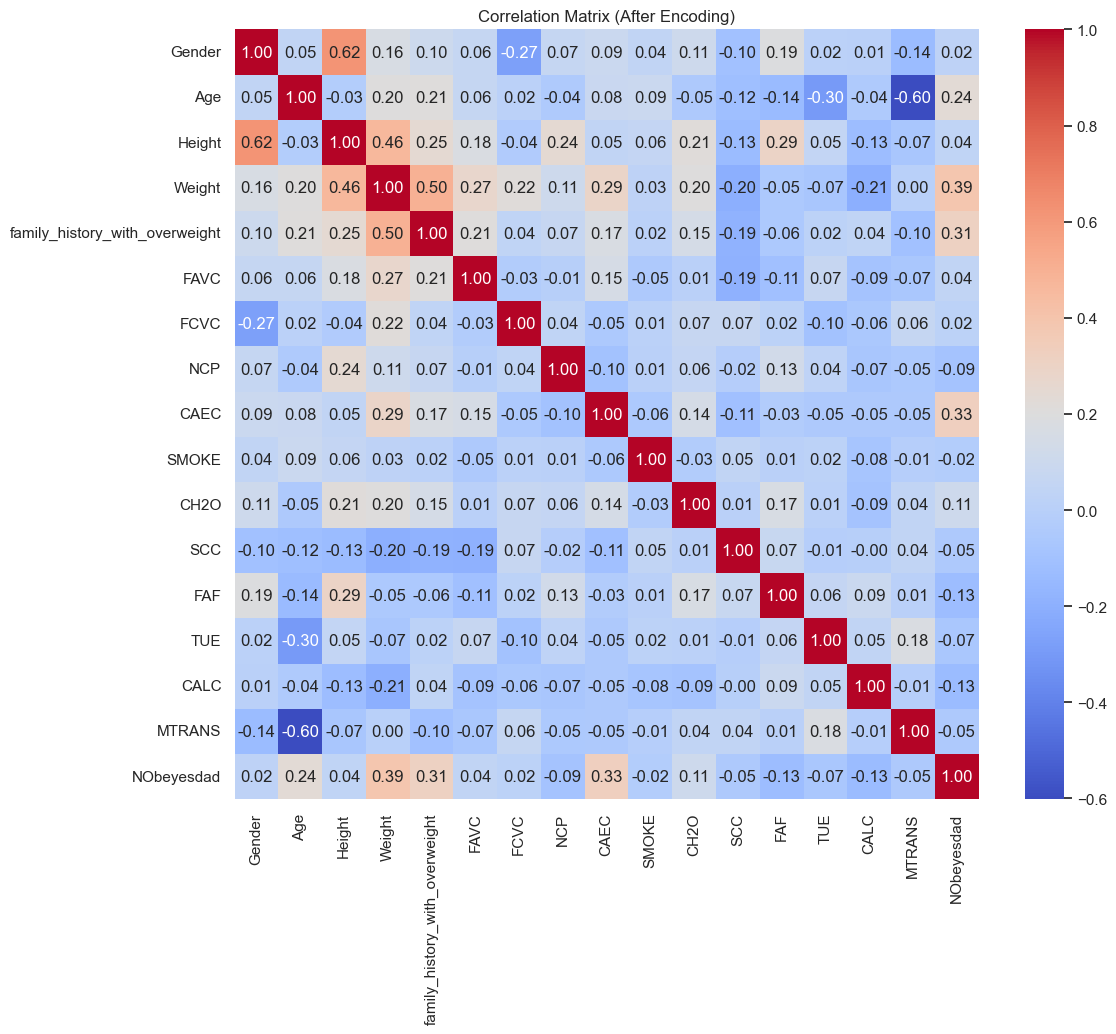

In [24]:
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix (After Encoding)")
plt.show()

In [25]:
df_encoded = pd.get_dummies(df)

4.1.4 Correlation
What:
Use a heatmap to see pairwise correlations.

Why:
Identifies multicollinearity and strongest/weakest relationships.
Useful for selecting features and understanding dependencies.

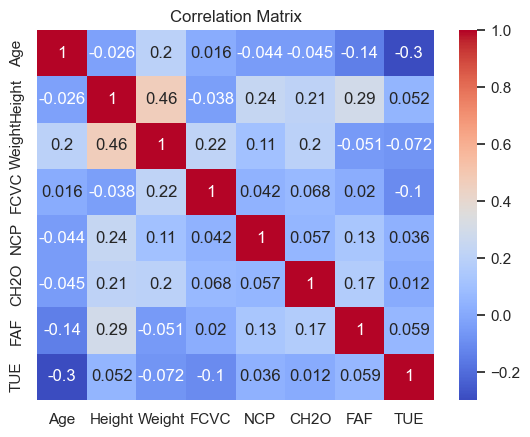

In [26]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#plt.title("Correlation Matrix")
#plt.show()

df_numeric = df.select_dtypes(include=[np.number])  # Keep only numeric columns
sns.heatmap(df_numeric.corr(), annot=True, cmap='coolwarm')  # Create heatmap
plt.title("Correlation Matrix")
plt.show()


4.1.5 Discover Outliers
What:
Use boxplots.

Why:
Visually detect extreme values (outliers) that could skew models, especially linear regression.




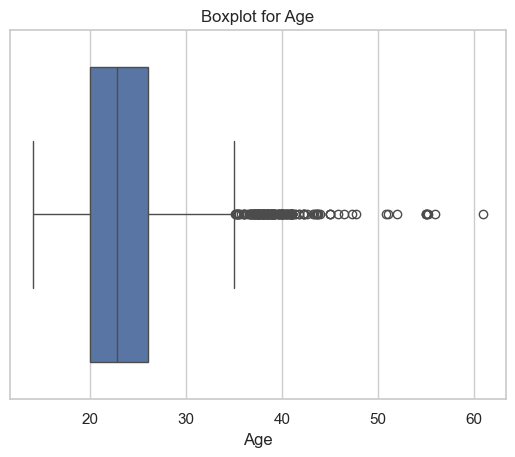

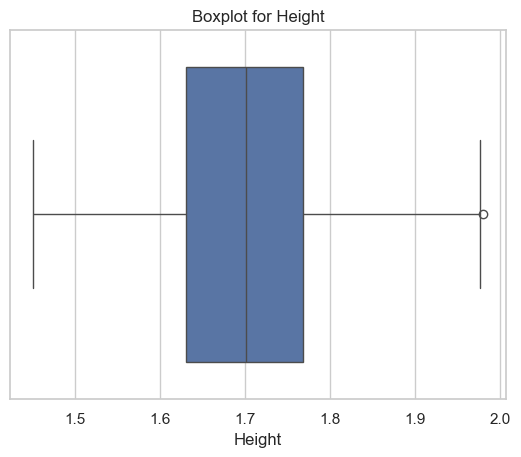

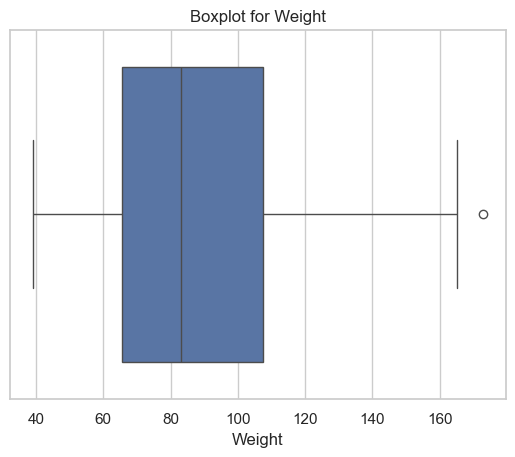

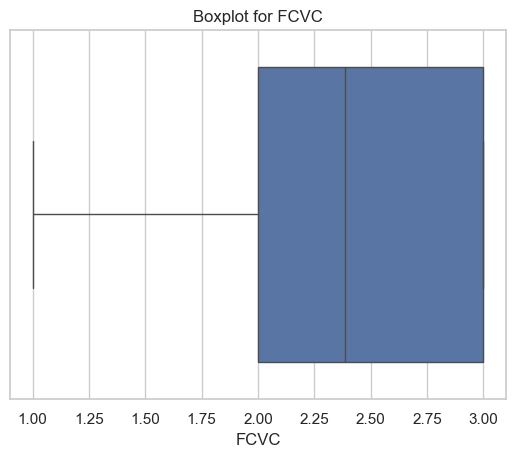

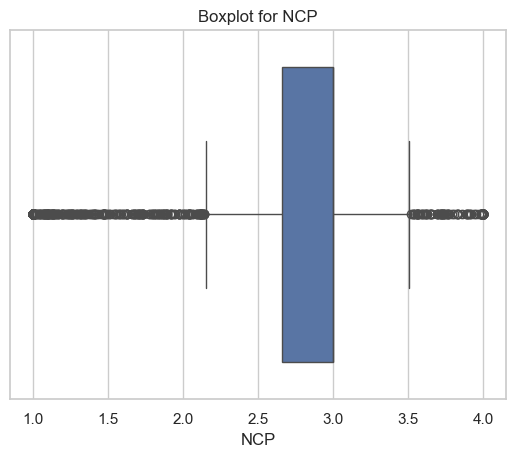

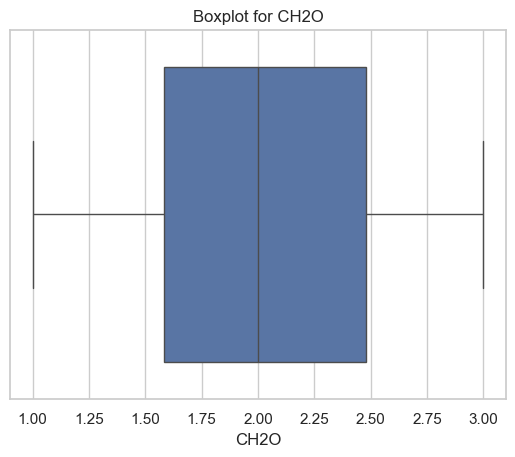

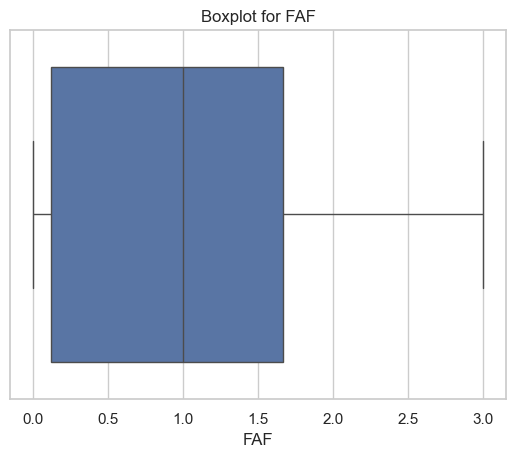

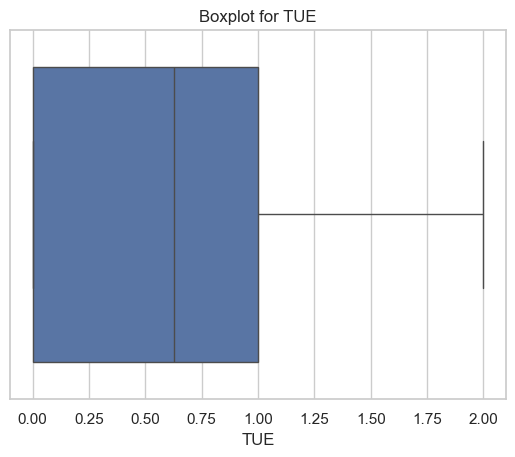

In [27]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numeric_cols:
    sns.boxplot(data=df, x=col)
    plt.title(f"Boxplot for {col}")
    plt.show()


4.1.6 Missing Values
What:
Use df.isnull().sum().
Why:
Determine which features have missing data and how to handle it:
Drop rows/columns.
Impute (mean/median/mode).


In [28]:
df.isnull().sum()


Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

4.2 Prepare the Data
What:
Encode categorical variables (e.g., gender, meal habits).
Scale numerical features (using StandardScaler).
Why:
Machine learning models like regression and distance-based models (like KNN, SVM) require numerical input.
Standardization improves model convergence and accuracy.

In [29]:
# Encode categorical variables
le = LabelEncoder()
for col in df.select_dtypes(include='object').columns:
    df[col] = le.fit_transform(df[col])

# Feature Scaling
scaler = StandardScaler()
X = df.drop("NObeyesdad", axis=1)
y = df["NObeyesdad"]
X_scaled = scaler.fit_transform(X)


5. Apply Models


5.3 Linear Regression (e.g., predict Weight or BMI if target is numeric)
What:
Used to predict continuous outcomes (like Weight or BMI).
Why:
When your target variable is numeric (regression problem), e.g., predicting a person’s weight based on habits.



In [30]:
y_linear = df["Weight"]  # or "BMI"
X_linear = df.drop(["Weight", "NObeyesdad"], axis=1)

X_train, X_test, y_train, y_test = train_test_split(X_linear, y_linear, test_size=0.2, random_state=42)
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))


MSE: 309.72994117693514
R2 Score: 0.5607358689743239


 6. Conclusion and Interpretation
What:
Summarize the findings from both regression models and EDA.

Why:
Provides insights:

Which features influence weight/obesity?

How well the model performed?

What can be improved in future iterations?

5.2 Logistic Regression (Classification)


In [31]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)
y_pred = logreg.predict(X_test)

print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))


[[56  0  0  0  0  0  0]
 [11 39  0  0  0  8  4]
 [ 0  0 70  7  0  0  1]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  4  0  0  0 44  8]
 [ 0  0  3  0  0  5 42]]
              precision    recall  f1-score   support

           0       0.84      1.00      0.91        56
           1       0.91      0.63      0.74        62
           2       0.93      0.90      0.92        78
           3       0.89      0.97      0.93        58
           4       1.00      1.00      1.00        63
           5       0.77      0.79      0.78        56
           6       0.76      0.84      0.80        50

    accuracy                           0.87       423
   macro avg       0.87      0.87      0.87       423
weighted avg       0.88      0.87      0.87       423



5.1 Decision Tree (if included)
(You can use from sklearn.tree import DecisionTreeClassifier)



In [32]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
import matplotlib.pyplot as plt

In [33]:
# Prepare Data
# -------------------------------
X = df.drop('NObeyesdad', axis=1)
y = df['NObeyesdad']

In [34]:
# Encode categorical variables
X_encoded = pd.get_dummies(X)


In [35]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size=0.2, random_state=42)


In [36]:
# 5.1: Basic Decision Tree
# -------------------------------
dt_basic = DecisionTreeClassifier(random_state=42)
dt_basic.fit(X_train, y_train)

y_pred_basic = dt_basic.predict(X_test)
print("=== Decision Tree (Basic) ===")
print(confusion_matrix(y_test, y_pred_basic))
print(classification_report(y_test, y_pred_basic))

=== Decision Tree (Basic) ===
[[54  2  0  0  0  0  0]
 [ 5 54  0  0  0  3  0]
 [ 0  1 72  3  0  0  2]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  7  0  0  0 49  0]
 [ 0  0  0  0  0  2 48]]
              precision    recall  f1-score   support

           0       0.92      0.96      0.94        56
           1       0.84      0.87      0.86        62
           2       0.96      0.92      0.94        78
           3       0.95      0.95      0.95        58
           4       1.00      1.00      1.00        63
           5       0.91      0.88      0.89        56
           6       0.96      0.96      0.96        50

    accuracy                           0.93       423
   macro avg       0.93      0.93      0.93       423
weighted avg       0.93      0.93      0.93       423



In [37]:
# 5.2: Pruned Decision Tree
# -------------------------------
dt_pruned = DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)
dt_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5, min_samples_split=10, random_state=42)

In [38]:
y_pred_pruned = dt_pruned.predict(X_test)
print("\n=== Decision Tree (Pruned) ===")
print(confusion_matrix(y_test, y_pred_pruned))
print(classification_report(y_test, y_pred_pruned))



=== Decision Tree (Pruned) ===
[[52  4  0  0  0  0  0]
 [ 7 39  0  0  0 12  4]
 [ 0  0 74  2  0  2  0]
 [ 0  0  3 55  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  3  0  0  0 35 18]
 [ 0  0 15  0  0  0 35]]
              precision    recall  f1-score   support

           0       0.88      0.93      0.90        56
           1       0.85      0.63      0.72        62
           2       0.80      0.95      0.87        78
           3       0.96      0.95      0.96        58
           4       1.00      1.00      1.00        63
           5       0.71      0.62      0.67        56
           6       0.61      0.70      0.65        50

    accuracy                           0.83       423
   macro avg       0.83      0.83      0.82       423
weighted avg       0.84      0.83      0.83       423



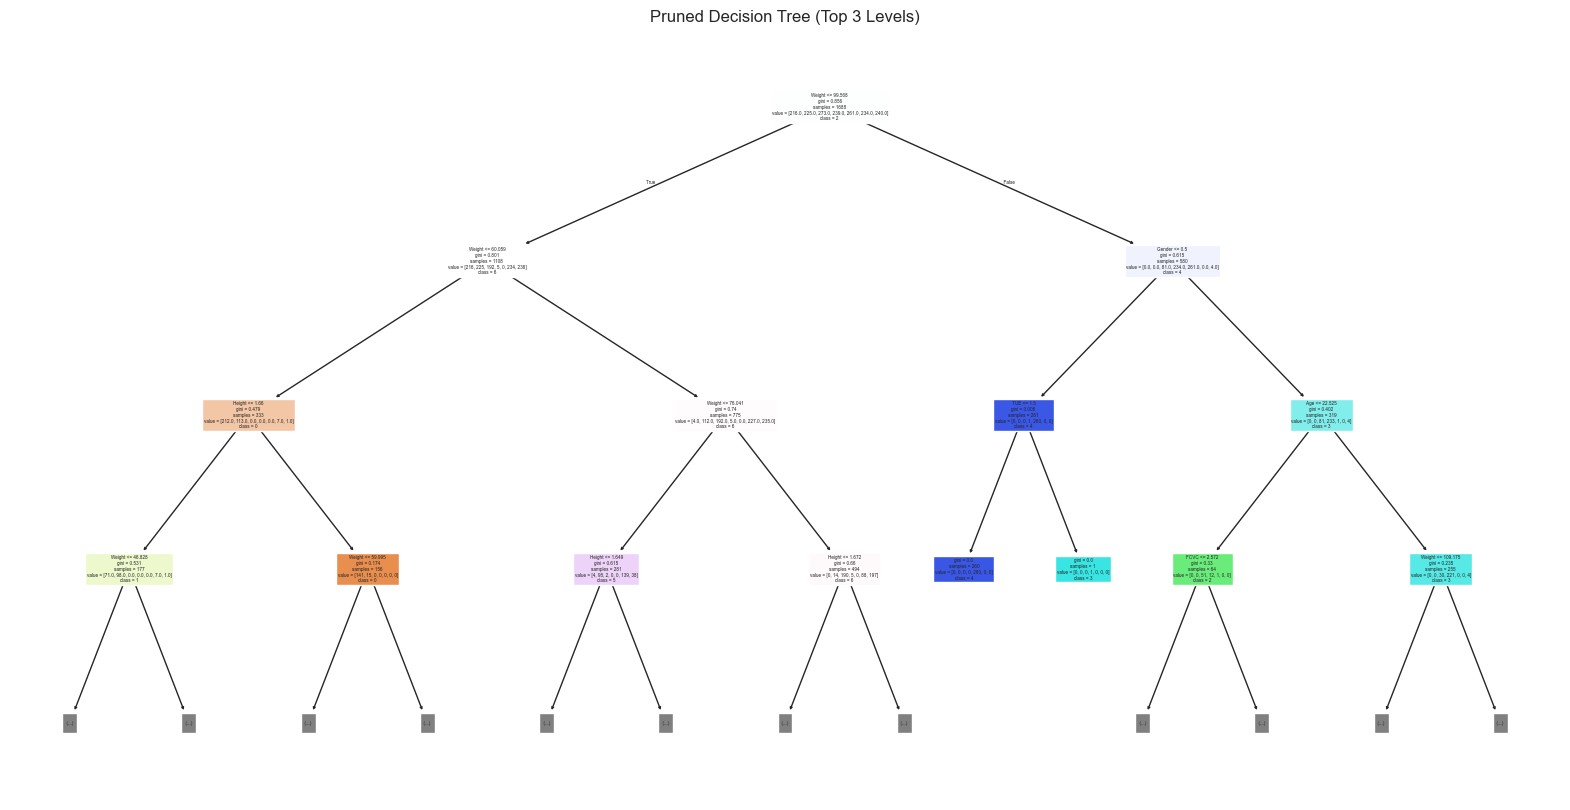

In [39]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(20, 10))
plot_tree(
    dt_pruned,
    feature_names=X_encoded.columns,
    class_names=[str(cls) for cls in dt_pruned.classes_],  # FIX applied here
    filled=True,
    max_depth=3
)
plt.title("Pruned Decision Tree (Top 3 Levels)")
plt.show()


In [40]:
# 5.3: Decision Tree with GridSearchCV
# -------------------------------
param_grid = {
    'max_depth': [3, 5, 7, 10],
    'min_samples_split': [2, 5, 10],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(
    estimator=DecisionTreeClassifier(random_state=42),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1
)


In [41]:
grid_search.fit(X_train, y_train)
best_dt = grid_search.best_estimator_

y_pred_grid = best_dt.predict(X_test)
print("\n=== Decision Tree (GridSearchCV Best Model) ===")
print("Best Params:", grid_search.best_params_)
print(confusion_matrix(y_test, y_pred_grid))
print(classification_report(y_test, y_pred_grid))


=== Decision Tree (GridSearchCV Best Model) ===
Best Params: {'criterion': 'entropy', 'max_depth': 10, 'min_samples_split': 2}
[[53  3  0  0  0  0  0]
 [ 5 56  0  0  0  1  0]
 [ 0  0 76  2  0  0  0]
 [ 0  0  2 56  0  0  0]
 [ 0  0  0  0 63  0  0]
 [ 0  0  0  0  0 56  0]
 [ 0  0  0  0  0  3 47]]
              precision    recall  f1-score   support

           0       0.91      0.95      0.93        56
           1       0.95      0.90      0.93        62
           2       0.97      0.97      0.97        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.93      1.00      0.97        56
           6       1.00      0.94      0.97        50

    accuracy                           0.96       423
   macro avg       0.96      0.96      0.96       423
weighted avg       0.96      0.96      0.96       423

